# Agenda

1. Background on polotting in Python/Pandas
2. Plotting with a series
    - line plot
    - bar plot
    - histogram
    - pie plot
    - boxplot
3. Plotting with a data frame
    - line
    - bar
    - histogram
    - pie plot
    - boxplot
4. Scatterplot
5. Tricks with plots
6. Seaborn

# Background on plotting

Matplotlib is powerful but hard. We can use Pandas to plot with it.

In [2]:
import pandas as pd
from pandas import Series, DataFrame

In [3]:
s = Series([10, 20, 30, 40, 50, 30, 20, 50, 60])
s

0    10
1    20
2    30
3    40
4    50
5    30
6    20
7    50
8    60
dtype: int64

<Axes: >

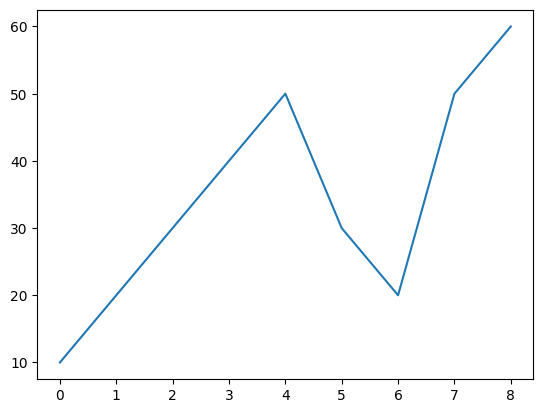

In [4]:
s.plot()

In [5]:
s = Series([10, 20, 30, 40, 50, 30, 20, 50, 60],
           index=list('abcdefghi'))
s

a    10
b    20
c    30
d    40
e    50
f    30
g    20
h    50
i    60
dtype: int64

<Axes: >

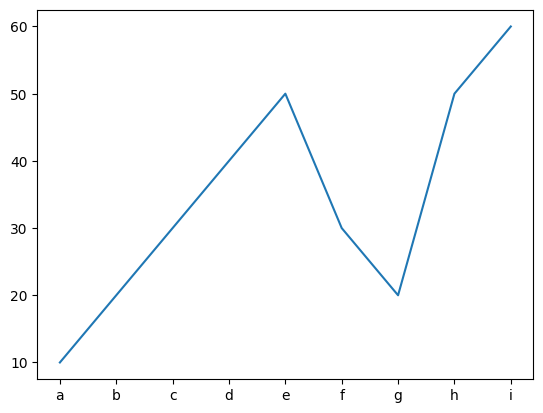

In [6]:
s.plot()

<Axes: >

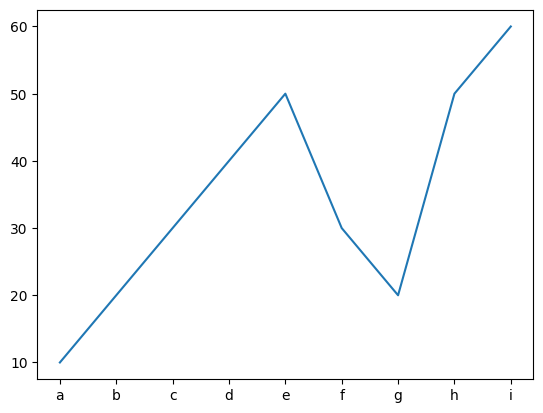

In [7]:
# the default is a line plot!
# two better ways to do this

s.plot(kind='line')

<Axes: >

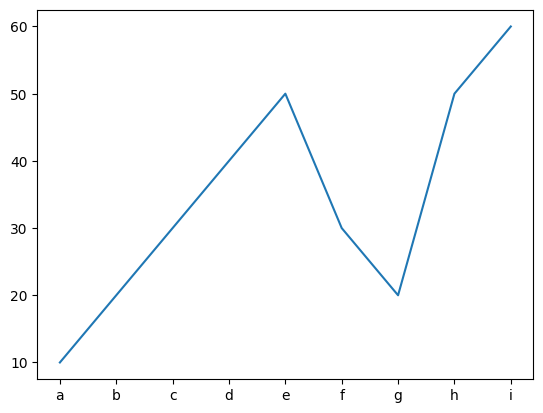

In [8]:
# we can also use plot as a name, and invoke a method on it
s.plot.line()

In [9]:
type(s.plot)

pandas.plotting._core.PlotAccessor

<Axes: >

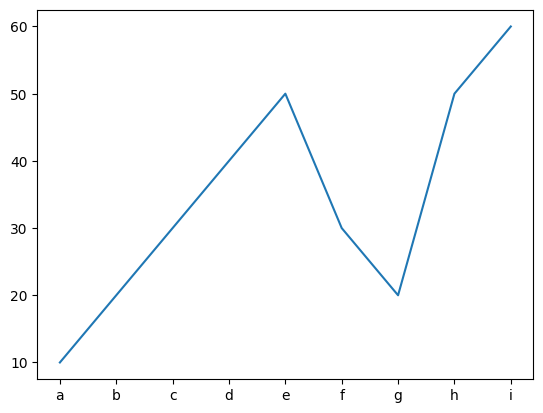

In [10]:
s.plot.__call__()

matplotlib.axes._axes.Axes

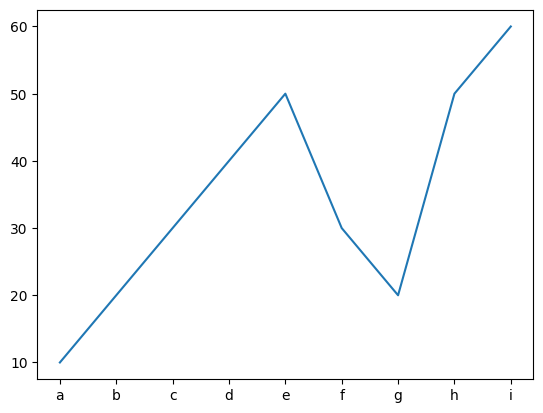

In [11]:
type(s.plot())

In [12]:
help(s.plot.line)

Help on method line in module pandas.plotting._core:

line(x: 'Hashable | None' = None, y: 'Hashable | None' = None, **kwargs) -> 'PlotAccessor' method of pandas.plotting._core.PlotAccessor instance
    Plot Series or DataFrame as lines.

    This function is useful to plot lines using DataFrame's values
    as coordinates.

            Parameters
            ----------
            x : label or position, optional
                Allows plotting of one column versus another. If not specified,
                the index of the DataFrame is used.
            y : label or position, optional
                Allows plotting of one column versus another. If not specified,
                all numerical columns are used.
            color : str, array-like, or dict, optional
                The color for each of the DataFrame's columns. Possible values are:

                - A single color string referred to by name, RGB or RGBA code,
                    for instance 'red' or '#a98d19'.

      

In [13]:
help(DataFrame.plot)

Help on class PlotAccessor in module pandas.plotting._core:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data: 'Series | DataFrame') -> 'None'
 |
 |  Make plots of Series or DataFrame.
 |
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' :

<Axes: title={'center': 'My great plot'}>

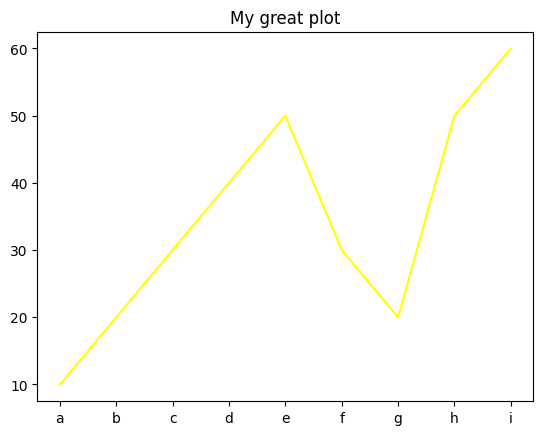

In [16]:
s.plot.line(title='My great plot',
           color='yellow')

<Axes: title={'center': 'My great plot'}>

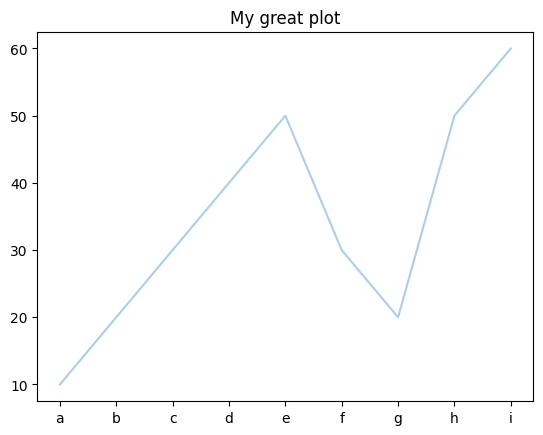

In [17]:
s.plot.line(title='My great plot',
           color='#abcdef')

<Axes: title={'center': 'My great plot'}>

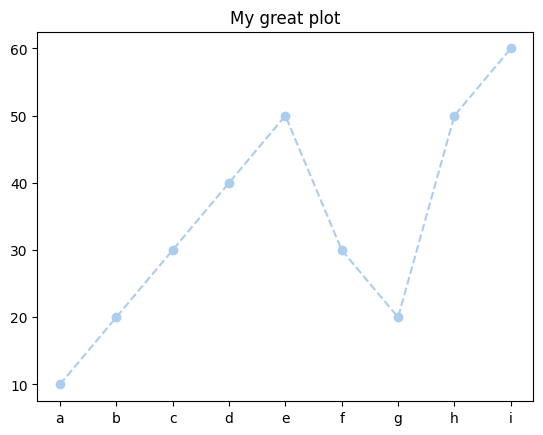

In [23]:
s.plot.line(title='My great plot',
           color='#abcdef',
           style='o--')

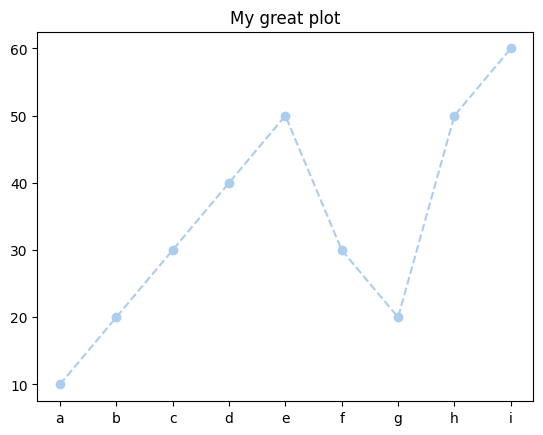

In [24]:
axes = s.plot.line(title='My great plot',
           color='#abcdef',
           style='o--')

In [25]:
fig = axes.get_figure()


In [26]:
fig.savefig('myfig.png')

In [27]:
fig.savefig('myfig.jpg')

In [28]:
fig.savefig('myfig.pdf')

In [29]:
!ls

2025-05May-29-visualization.ipynb  myfig.pdf  README.md
myfig.jpg			   myfig.png  README.md~


In [30]:
!open myfig.png

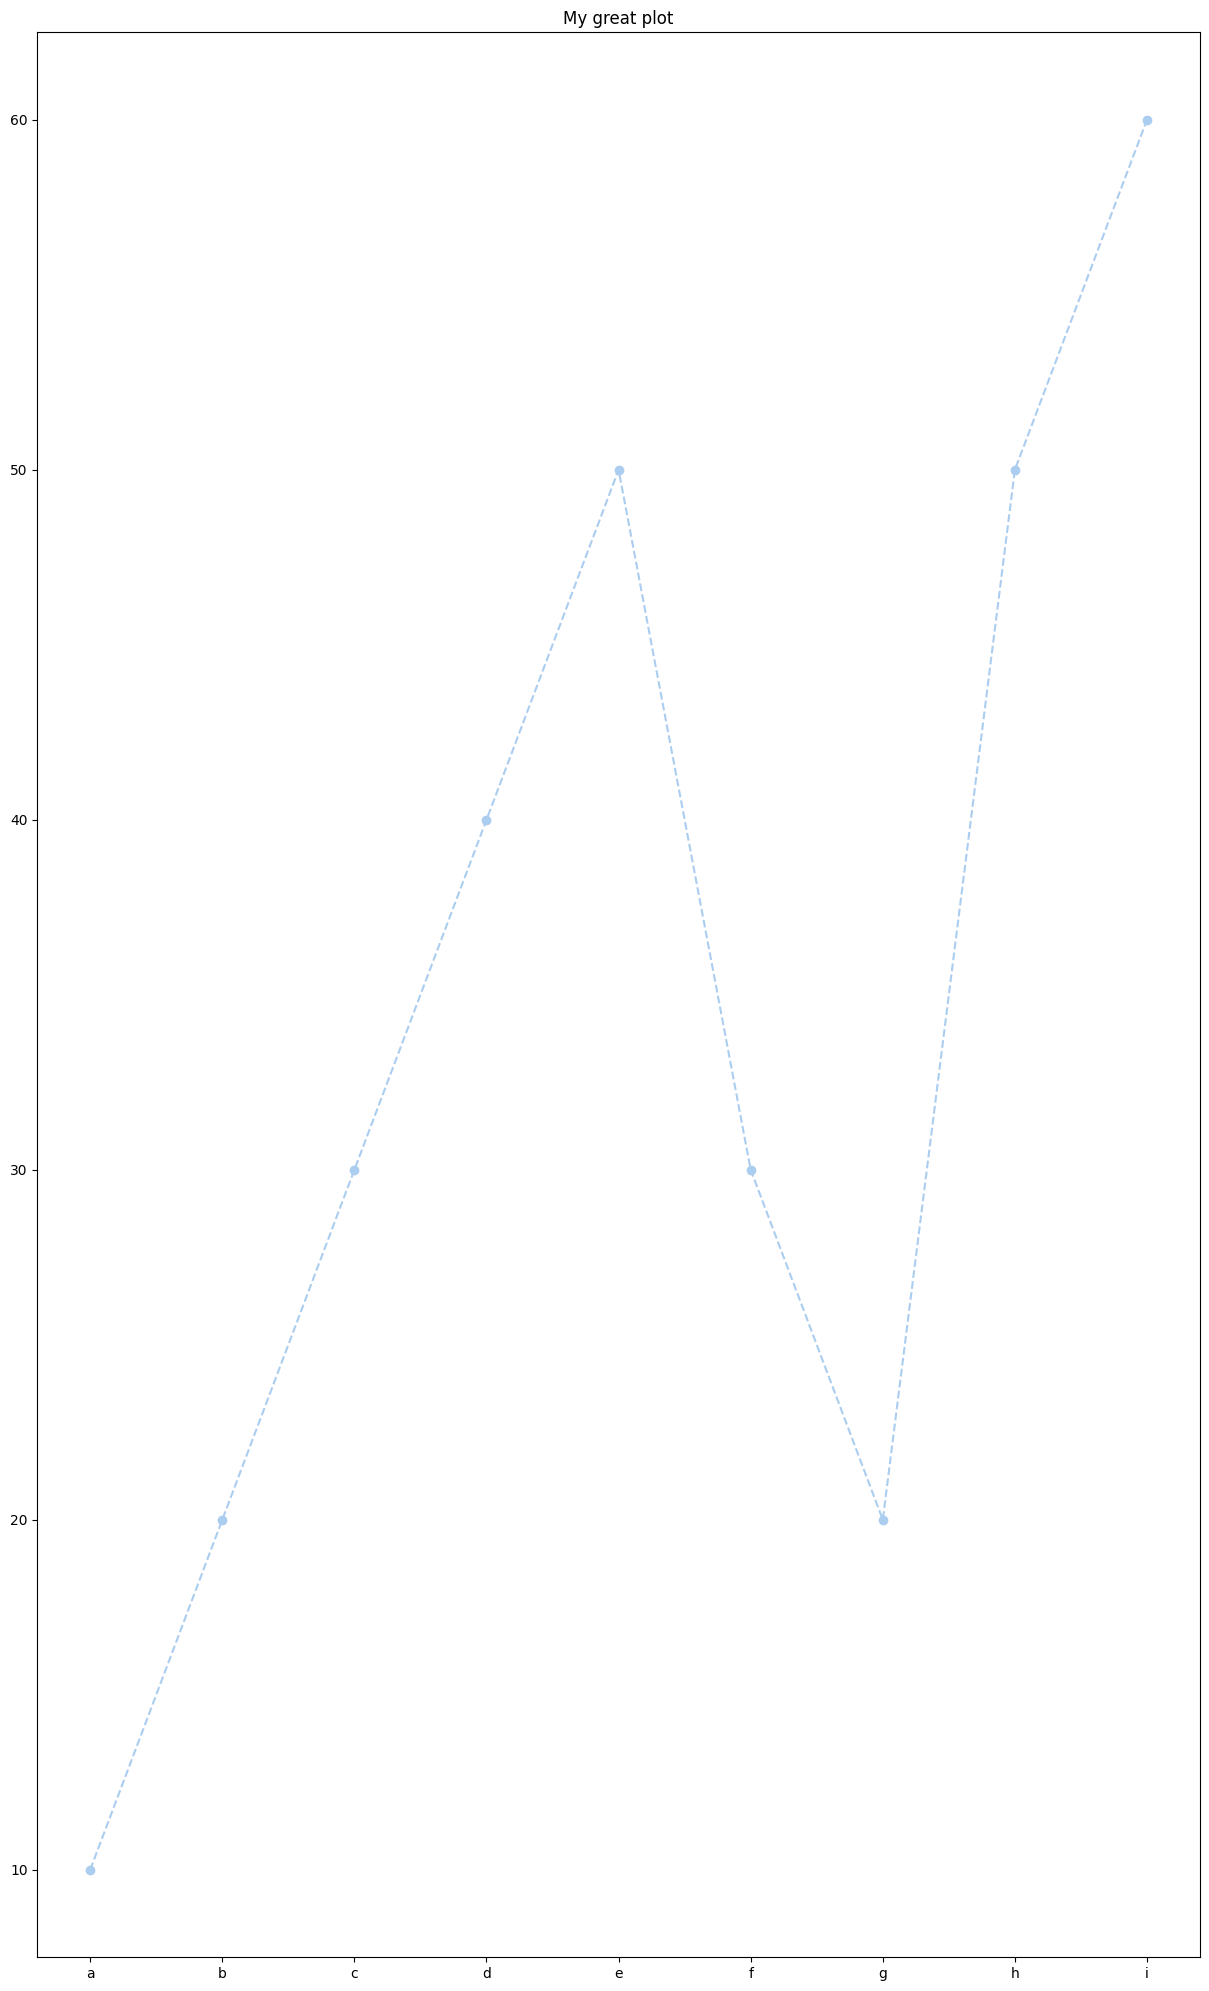

In [32]:
axes = s.plot.line(title='My great plot',
           color='#abcdef',
           style='o--',
                  figsize=(15, 25))

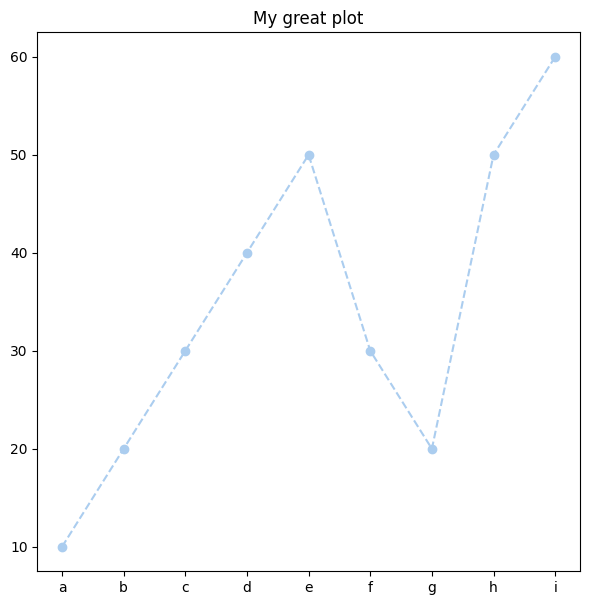

In [33]:
axes = s.plot.line(title='My great plot',
           color='#abcdef',
           style='o--',
           figsize=(7, 7))

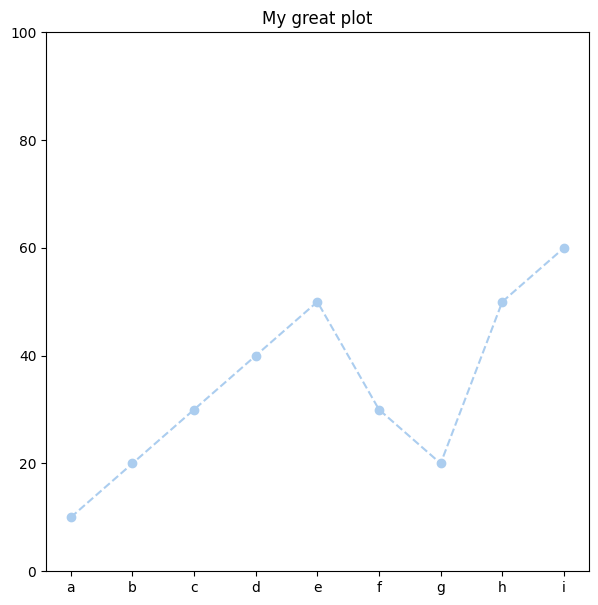

In [35]:
axes = s.plot.line(title='My great plot',
           color='#abcdef',
           style='o--',
           figsize=(7, 7),
                  ylim=(0, 100))

# Exercise: Temperature plot

1. Define a series with 10 elements, the max/high temp predicted for the next 10 days.
2. Plot with a line plot, from -10 to 40 on the y axis.

In [36]:
high_temps = Series([28, 33, 28, 26, 26, 28, 31, 32, 32, 32],
                   index='0530 0531 0601 0602 0603 0604 0605 0606 0607 0608'.split())
high_temps

0530    28
0531    33
0601    28
0602    26
0603    26
0604    28
0605    31
0606    32
0607    32
0608    32
dtype: int64

<Axes: title={'center': 'High temps'}>

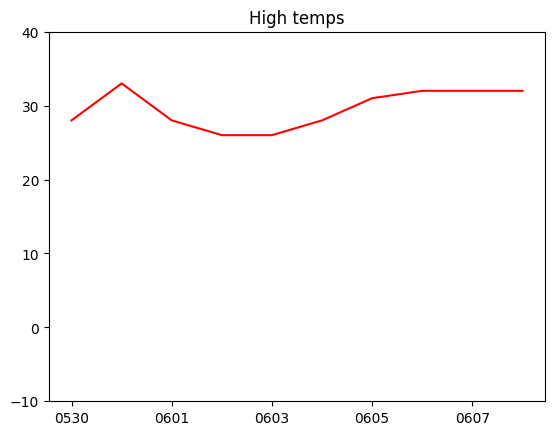

In [39]:
high_temps.plot.line(title='High temps',
                    ylim=(-10, 40), color='red')

In [41]:
low_temps = Series([18, 18, 17, 17, 16, 17, 18, 19, 19, 19],
                   index='0530 0531 0601 0602 0603 0604 0605 0606 0607 0608'.split())
low_temps

0530    18
0531    18
0601    17
0602    17
0603    16
0604    17
0605    18
0606    19
0607    19
0608    19
dtype: int64

<Axes: >

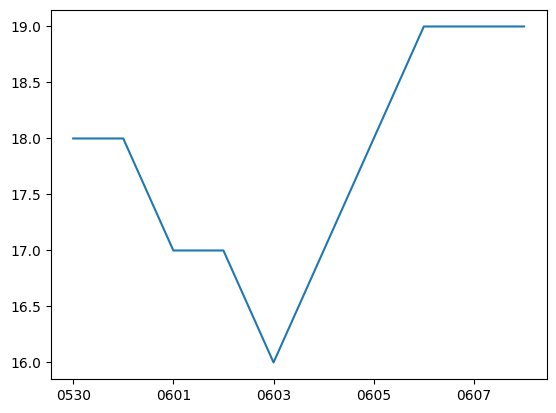

In [42]:
low_temps.plot.line()

<Axes: title={'center': 'High temps'}>

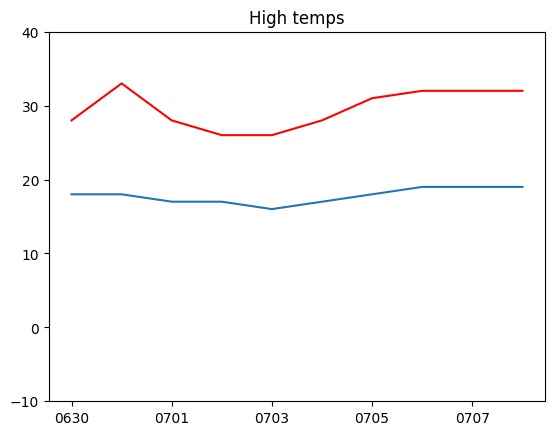

In [44]:
low_temps = Series([18, 18, 17, 17, 16, 17, 18, 19, 19, 19],
                   index='0630 0631 0701 0702 0703 0704 0705 0706 0707 0708'.split())
low_temps
ax = high_temps.plot.line(title='High temps',
                    ylim=(-10, 40), color='red')
low_temps.plot.line(ax=ax)

<Axes: >

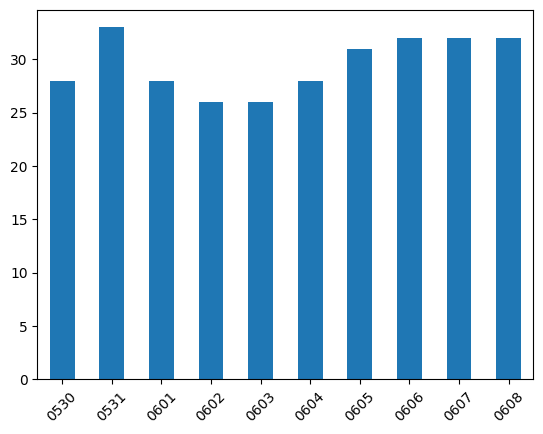

In [52]:
# bar plot

high_temps.plot.bar(rot=45)

<Axes: >

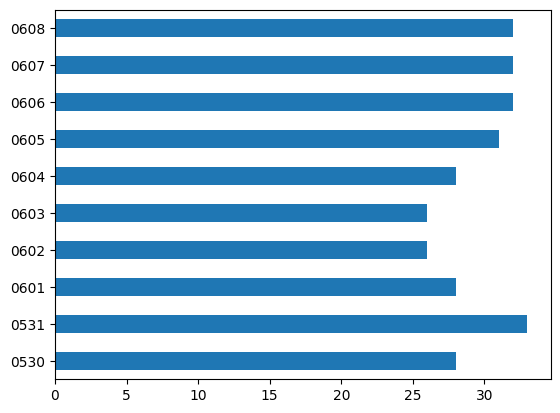

In [53]:
# bar plot (horizontal)

high_temps.plot.barh()

# Exercise: New York temps

1. Open `new+york,ny.csv` (on this GitHub repo) into a data frame
2. Set `date_time` to be the index as `datetime` values
3. use a line plot, then a bar plot, to show the max temp in NY.

In [66]:
s = pd.read_csv('new+york,ny.csv',
                usecols=[0, 1],
                 names=['datetime', 'maxtemp'],
                parse_dates=['datetime'],
                header=0,
                index_col='datetime')['maxtemp']
s

datetime
2018-12-11 00:00:00    4
2018-12-11 03:00:00    4
2018-12-11 06:00:00    4
2018-12-11 09:00:00    4
2018-12-11 12:00:00    4
                      ..
2019-03-11 09:00:00    6
2019-03-11 12:00:00    6
2019-03-11 15:00:00    6
2019-03-11 18:00:00    6
2019-03-11 21:00:00    6
Name: maxtemp, Length: 728, dtype: int64

In [67]:
s.dtype

dtype('int64')

<Axes: xlabel='datetime'>

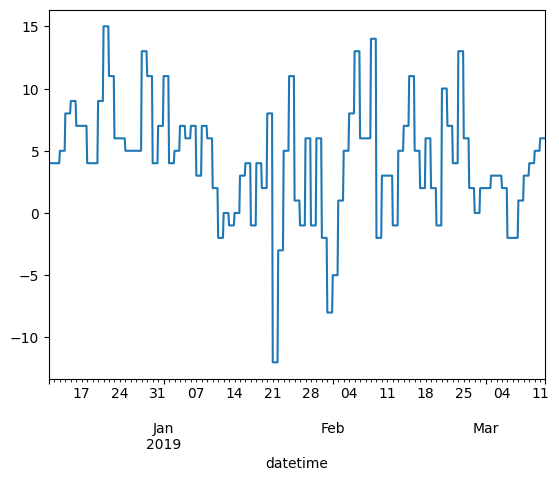

In [68]:
s.plot.line()

<Axes: xlabel='datetime'>

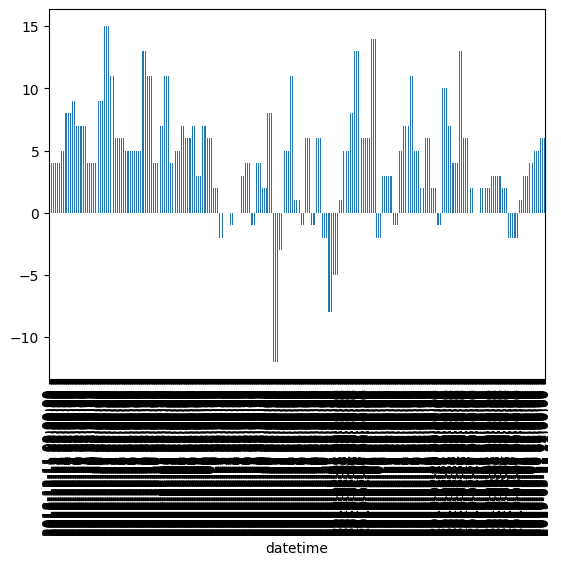

In [69]:
s.plot.bar()

<Axes: ylabel='Frequency'>

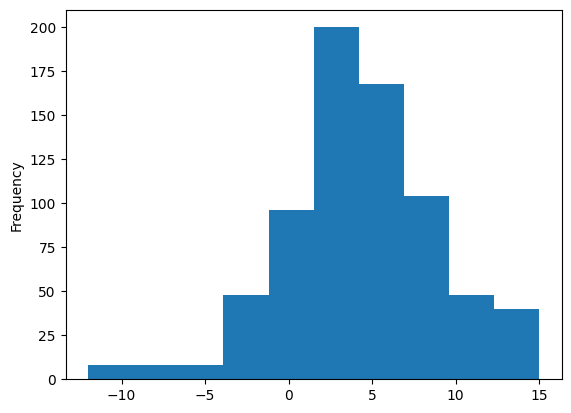

In [70]:
# histogram 

s.plot.hist()

<Axes: ylabel='Frequency'>

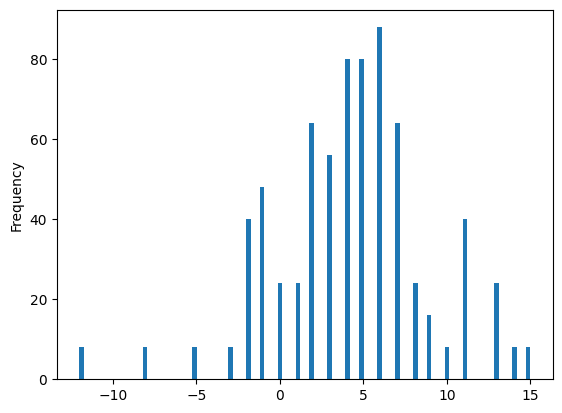

In [72]:
s.plot.hist(bins=100)

In [73]:
s.iloc[-1] = 100

<Axes: ylabel='Frequency'>

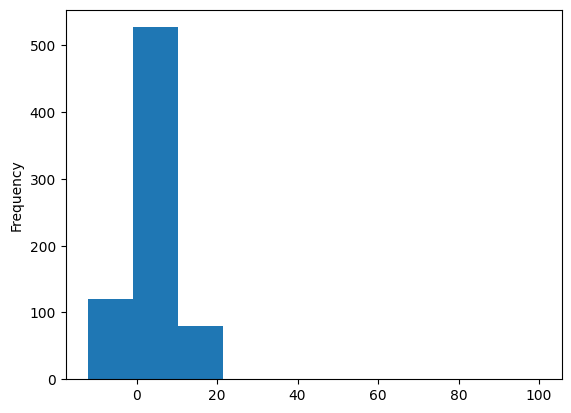

In [74]:
s.plot.hist()

<Axes: ylabel='Frequency'>

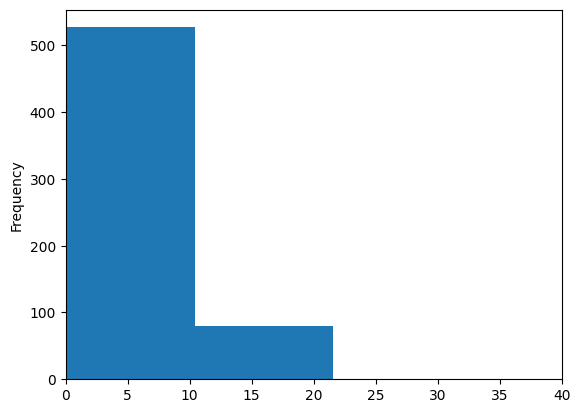

In [76]:
s.plot.hist(xlim=(0, 40))

<Axes: ylabel='Frequency'>

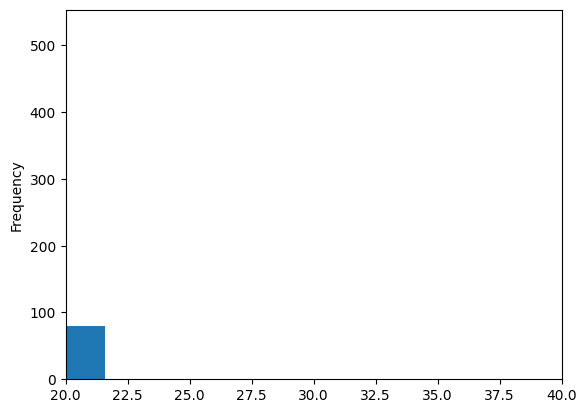

In [77]:
s.plot.hist(xlim=(20, 40))

In [78]:
high_temps

0530    28
0531    33
0601    28
0602    26
0603    26
0604    28
0605    31
0606    32
0607    32
0608    32
dtype: int64

In [79]:
high_temps.value_counts()

28    3
32    3
26    2
33    1
31    1
Name: count, dtype: int64

In [80]:
high_temps.value_counts(normalize=True)

28    0.3
32    0.3
26    0.2
33    0.1
31    0.1
Name: proportion, dtype: float64

<Axes: >

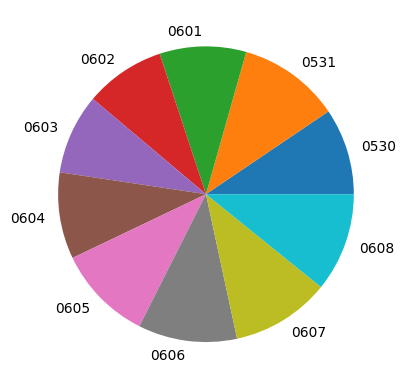

In [81]:
# pie plot

high_temps.plot.pie()  # bad idea!

<Axes: ylabel='count'>

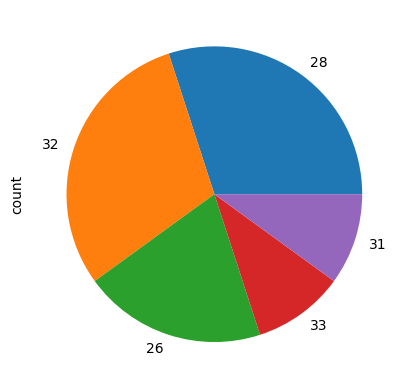

In [82]:
high_temps.value_counts().plot.pie()

In [84]:
# John Tukey

high_temps.describe()

count    10.000000
mean     29.600000
std       2.674987
min      26.000000
25%      28.000000
50%      29.500000
75%      32.000000
max      33.000000
dtype: float64

<Axes: >

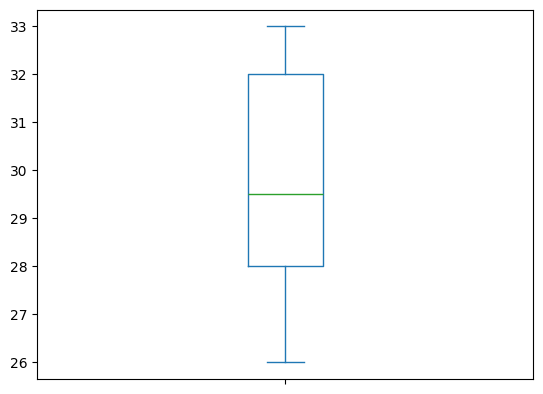

In [85]:
# boxplot
# box and whiskers plot

high_temps.plot.box()

In [88]:
high_temps.iloc[0] = 60

# Exercise: Pie and box plots

1. We'll again use the high temps from New York.
2. Create a pie plot showing how often each 10s digit appears in the values. (25 will be 2, etc.)
3. Create a boxplot from the temperatures. Are there outliers? What are they?

In [90]:
s = pd.read_csv('new+york,ny.csv',
                usecols=[0, 1],
                 names=['datetime', 'maxtemp'],
                parse_dates=['datetime'],
                header=0,
                index_col='datetime')['maxtemp']
s

datetime
2018-12-11 00:00:00    4
2018-12-11 03:00:00    4
2018-12-11 06:00:00    4
2018-12-11 09:00:00    4
2018-12-11 12:00:00    4
                      ..
2019-03-11 09:00:00    6
2019-03-11 12:00:00    6
2019-03-11 15:00:00    6
2019-03-11 18:00:00    6
2019-03-11 21:00:00    6
Name: maxtemp, Length: 728, dtype: int64

<Axes: ylabel='count'>

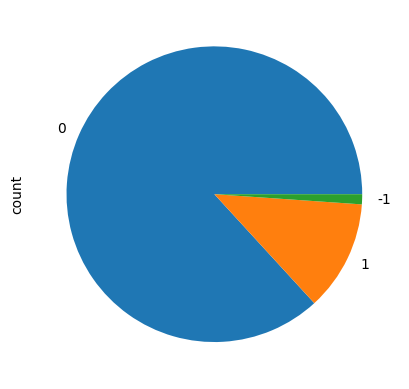

In [96]:
(s / 10).astype(int).value_counts().plot.pie()

<Axes: >

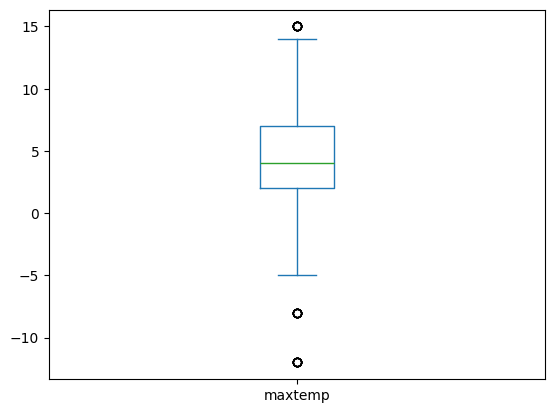

In [97]:
s.plot.box()

In [99]:
iqr = s.quantile(0.75) - s.quantile(0.25)
iqr  # inter quartile range

np.float64(5.0)

In [101]:
s.median() + iqr * 1.5

np.float64(11.5)

In [102]:
s.median() - iqr * 1.5

np.float64(-3.5)

In [105]:
s.loc[s > s.quantile(0.75) + iqr * 1.5]

datetime
2018-12-21 00:00:00    15
2018-12-21 03:00:00    15
2018-12-21 06:00:00    15
2018-12-21 09:00:00    15
2018-12-21 12:00:00    15
2018-12-21 15:00:00    15
2018-12-21 18:00:00    15
2018-12-21 21:00:00    15
Name: maxtemp, dtype: int64

In [107]:
s.loc[s < s.quantile(0.25) - iqr * 1.5]

datetime
2019-01-21 00:00:00   -12
2019-01-21 03:00:00   -12
2019-01-21 06:00:00   -12
2019-01-21 09:00:00   -12
2019-01-21 12:00:00   -12
2019-01-21 15:00:00   -12
2019-01-21 18:00:00   -12
2019-01-21 21:00:00   -12
2019-01-31 00:00:00    -8
2019-01-31 03:00:00    -8
2019-01-31 06:00:00    -8
2019-01-31 09:00:00    -8
2019-01-31 12:00:00    -8
2019-01-31 15:00:00    -8
2019-01-31 18:00:00    -8
2019-01-31 21:00:00    -8
Name: maxtemp, dtype: int64

# Plotting with q data frame

In [108]:
df = pd.read_csv('new+york,ny.csv',
                usecols=[0, 1, 2],
                 names=['datetime', 'maxtemp', 'mintemp'],
                parse_dates=['datetime'],
                header=0,
                index_col='datetime')
df

,maxtemp,mintemp
datetime,,
2018-12-11 00:00:00,4,-1
2018-12-11 03:00:00,4,-1
2018-12-11 06:00:00,4,-1
2018-12-11 09:00:00,4,-1
2018-12-11 12:00:00,4,-1
...,...,...
2019-03-11 09:00:00,6,2
2019-03-11 12:00:00,6,2
2019-03-11 15:00:00,6,2


<Axes: xlabel='datetime'>

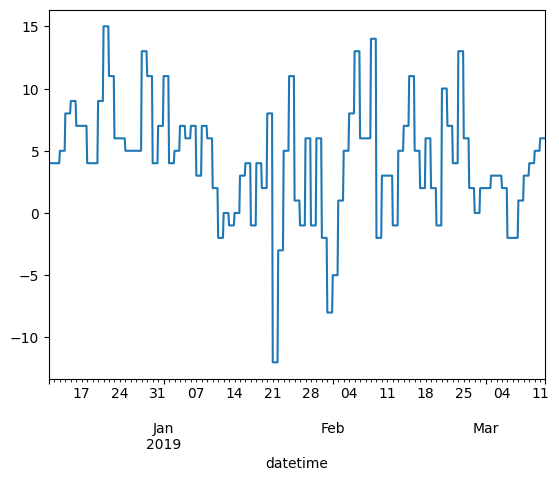

In [109]:
df['maxtemp'].plot.line()

<Axes: xlabel='datetime'>

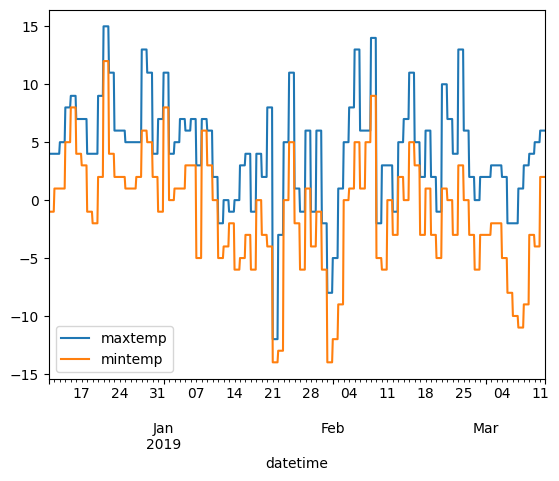

In [110]:
df.plot.line()

<Axes: xlabel='datetime'>

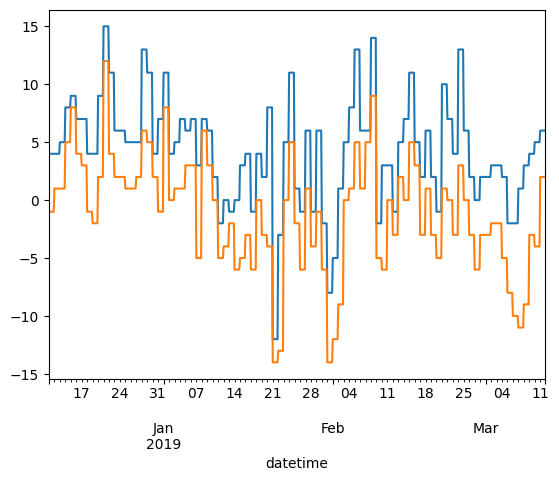

In [111]:
df.plot.line(legend=False)

<Axes: xlabel='datetime'>

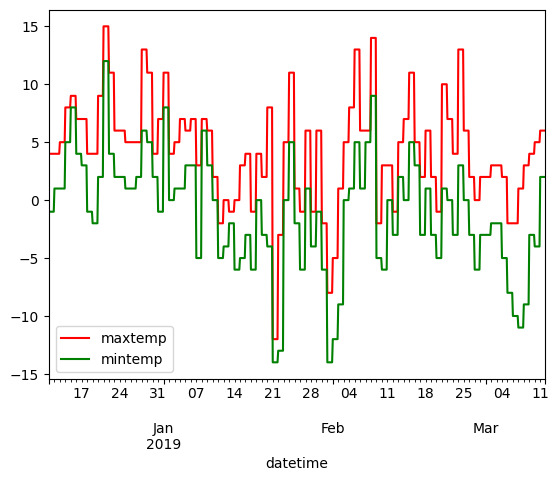

In [112]:
df.plot.line(color=['red', 'green'])

In [113]:
filenames = 'taxi.csv'

df = pd.read_csv(filenames)

In [115]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30


In [116]:
df[['fare_amount', 'tip_amount']]

,fare_amount,tip_amount
0,17.0,0.00
1,6.5,1.00
2,8.0,2.20
3,13.5,2.86
4,9.5,0.00
...,...,...
9994,11.0,0.00
9995,16.0,3.00
9996,21.0,0.00
9997,6.5,0.00


<Axes: >

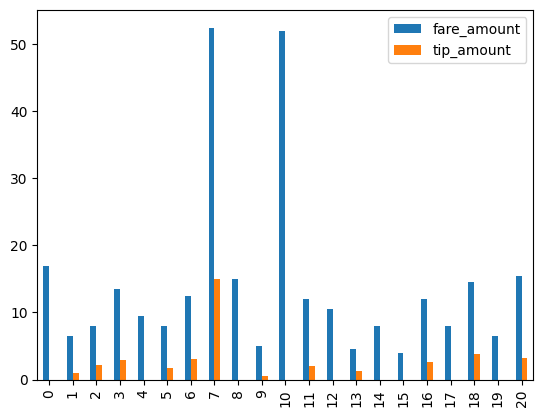

In [117]:
df[['fare_amount', 'tip_amount']].loc[:20].plot.bar()

<Axes: >

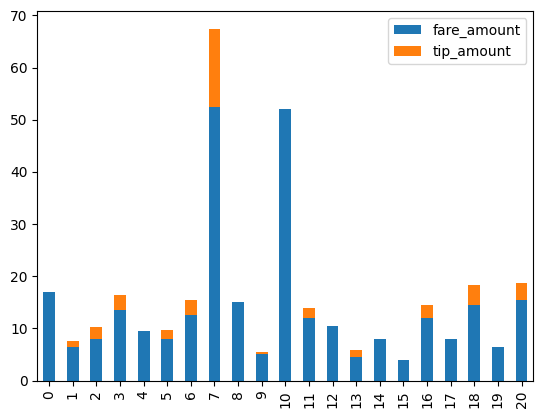

In [118]:
df[['fare_amount', 'tip_amount']].loc[:20].plot.bar(stacked=True)

array([<Axes: title={'center': 'fare_amount'}>,
       <Axes: title={'center': 'tip_amount'}>], dtype=object)

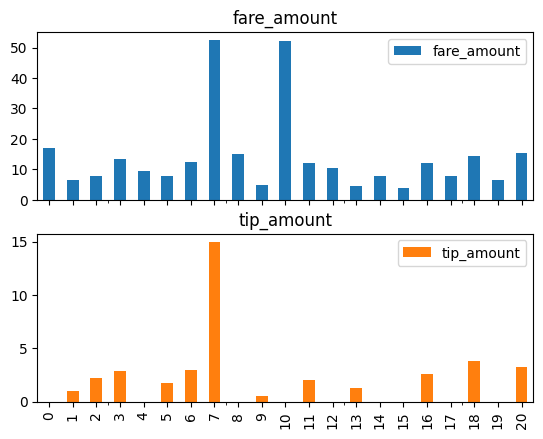

In [119]:
df[['fare_amount', 'tip_amount']].loc[:20].plot.bar(subplots=True)

In [120]:
df = pd.read_csv(filenames, 
                parse_dates=['tpep_pickup_datetime'],
                index_col='tpep_pickup_datetime')
df

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,
2015-06-02 11:19:29,2,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
2015-06-02 11:19:30,2,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2015-06-02 11:19:31,2,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
2015-06-02 11:19:31,2,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
2015-06-02 11:19:32,1,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-01 00:12:59,1,2015-06-01 00:24:18,1,2.70,-73.947792,40.814972,1,N,-73.973358,40.783638,2,11.0,0.5,0.5,0.00,0.0,0.3,12.30
2015-06-01 00:12:59,1,2015-06-01 00:28:16,1,4.50,-74.004066,40.747818,1,N,-73.953758,40.779285,1,16.0,0.5,0.5,3.00,0.0,0.3,20.30
2015-06-01 00:13:00,2,2015-06-01 00:37:25,1,5.59,-73.994377,40.766102,1,N,-73.903206,40.750546,2,21.0,0.5,0.5,0.00,0.0,0.3,22.30


In [121]:
df.loc['2015-06-02']

,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,
2015-06-02 11:19:29,2,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
2015-06-02 11:19:30,2,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2015-06-02 11:19:31,2,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
2015-06-02 11:19:31,2,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
2015-06-02 11:19:32,1,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-02 11:33:35,2,2015-06-02 11:42:16,1,0.73,-73.963364,40.768478,1,N,-73.954063,40.766628,2,7.0,0.0,0.5,0.00,0.0,0.3,7.80
2015-06-02 11:33:35,2,2015-06-02 11:38:53,1,0.96,-73.988922,40.730801,1,N,-73.983528,40.741451,1,6.0,0.0,0.5,1.70,0.0,0.3,8.50
2015-06-02 11:33:36,1,2015-06-02 11:52:32,2,3.50,-73.998528,40.764137,1,N,-73.958649,40.783257,1,16.0,0.0,0.5,2.00,0.0,0.3,18.80


# Exercise: Olympic medal plots

1. Create a data frame from `olympic_athlete_events.csv`
2. Keep only countries from the G7 (USA, "Great Britain", Canada, Italy, Germany, France, Japan), and only since 1980.
3. Show a bat plot, showing how many medals each country got. Each bar should be divided into gold, silver, and bronze portions.|

In [122]:
df = pd.read_csv('olympic_athlete_events.csv',
                usecols=['Team', 'Year', 'Medal'])
df

,Team,Year,Medal
0,China,1992,NaN
1,China,2012,NaN
2,Denmark,1920,NaN
3,Denmark/Sweden,1900,Gold
4,Netherlands,1988,NaN
...,...,...,...
271111,Poland-1,1976,NaN
271112,Poland,2014,NaN
271113,Poland,2014,NaN
271114,Poland,1998,NaN


<Axes: xlabel='Team'>

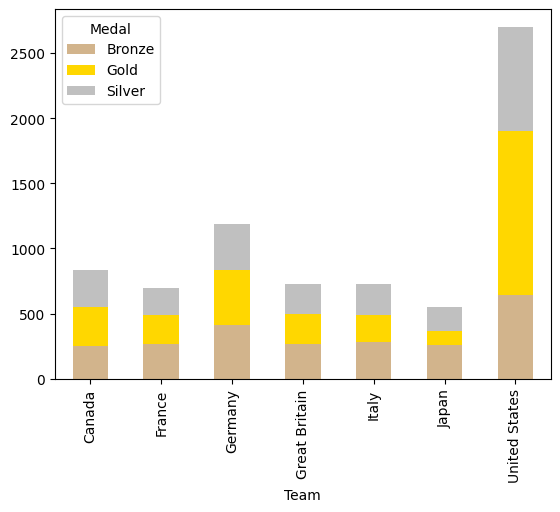

In [134]:
(
    df
    .loc[lambda df_: df_['Year'] >= 1980]
    .loc[lambda df_: df_['Team'].isin(['United States', 'France', 'Germany',
                                      'Japan', 'Italy', 'Canada', 'Great Britain'])]
    .pivot_table(index='Team',
                columns='Medal',
                values='Year',
                aggfunc='count')
    .plot.bar(stacked=True, color=['tan', 'gold', 'silver'])
)

<Axes: ylabel='Frequency'>

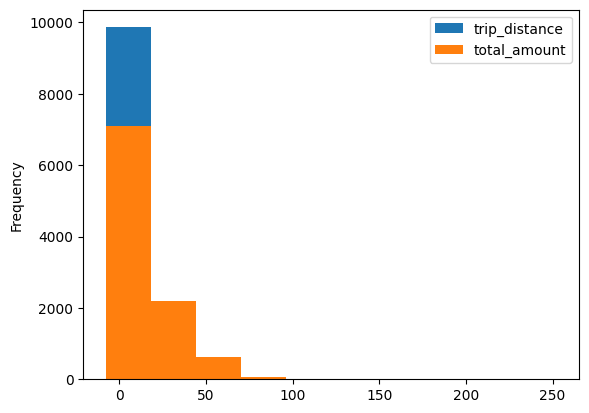

In [136]:
df = pd.read_csv('taxi.csv')

df[['trip_distance', 'total_amount']].plot.hist()

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

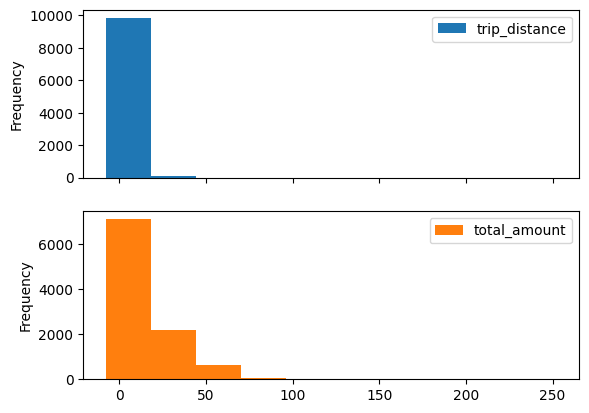

In [137]:
df[['trip_distance', 'total_amount']].plot.hist(subplots=True)

<Axes: ylabel='Frequency'>

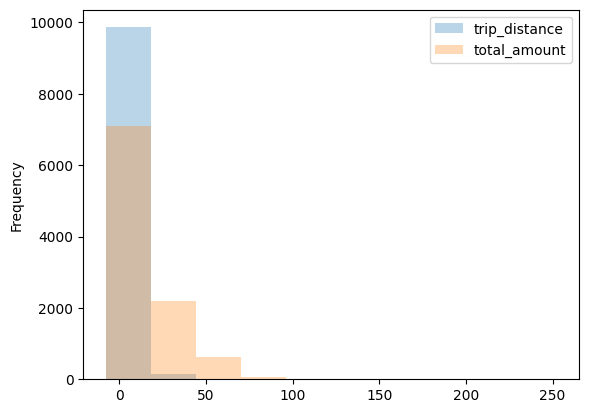

In [138]:
df[['trip_distance', 'total_amount']].plot.hist(alpha=0.3)

<Axes: >

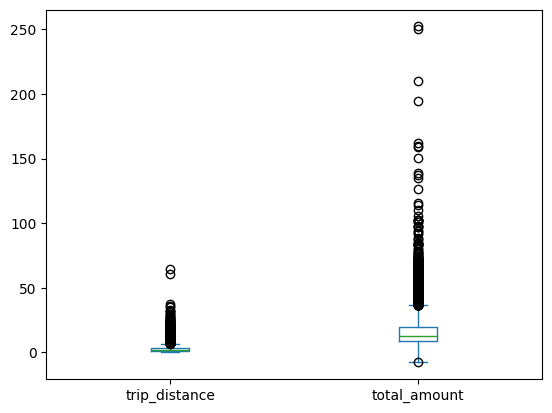

In [139]:
df[['trip_distance', 'total_amount']].plot.box()

trip_distance       Axes(0.125,0.11;0.352273x0.77)
total_amount     Axes(0.547727,0.11;0.352273x0.77)
dtype: object

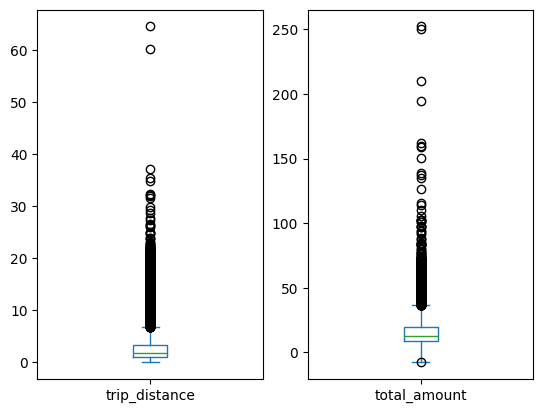

In [140]:
df[['trip_distance', 'total_amount']].plot.box(subplots=True)

VendorID                    Axes(0.125,0.11;0.0407895x0.77)
passenger_count          Axes(0.173947,0.11;0.0407895x0.77)
trip_distance            Axes(0.222895,0.11;0.0407895x0.77)
pickup_longitude         Axes(0.271842,0.11;0.0407895x0.77)
pickup_latitude          Axes(0.320789,0.11;0.0407895x0.77)
RateCodeID               Axes(0.369737,0.11;0.0407895x0.77)
dropoff_longitude        Axes(0.418684,0.11;0.0407895x0.77)
dropoff_latitude         Axes(0.467632,0.11;0.0407895x0.77)
payment_type             Axes(0.516579,0.11;0.0407895x0.77)
fare_amount              Axes(0.565526,0.11;0.0407895x0.77)
extra                    Axes(0.614474,0.11;0.0407895x0.77)
mta_tax                  Axes(0.663421,0.11;0.0407895x0.77)
tip_amount               Axes(0.712368,0.11;0.0407895x0.77)
tolls_amount             Axes(0.761316,0.11;0.0407895x0.77)
improvement_surcharge    Axes(0.810263,0.11;0.0407895x0.77)
total_amount             Axes(0.859211,0.11;0.0407895x0.77)
dtype: object

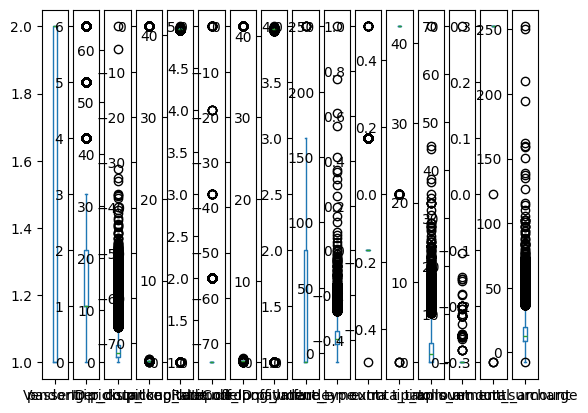

In [142]:
df.plot.box(subplots=True)

In [143]:
# scatter plots

In [144]:
df[['trip_distance', 'total_amount']].corr()

,trip_distance,total_amount
trip_distance,1.000000,0.880843
total_amount,0.880843,1.000000


<Axes: xlabel='trip_distance', ylabel='total_amount'>

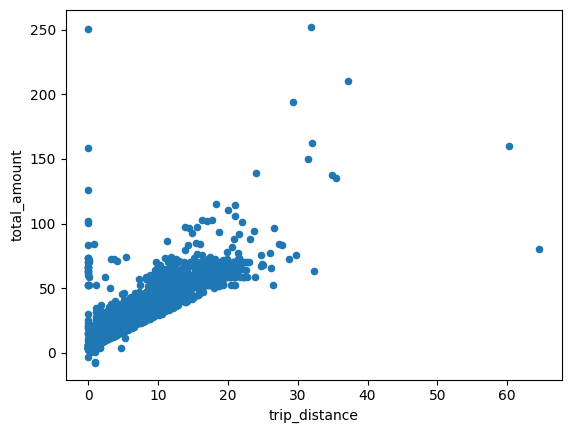

In [146]:
df.plot.scatter(x='trip_distance', y='total_amount')

<Axes: xlabel='passenger_count', ylabel='total_amount'>

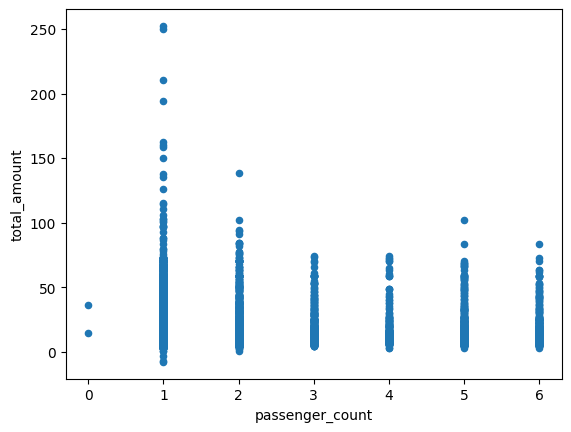

In [147]:
df.plot.scatter(x='passenger_count', y='total_amount')

<Axes: xlabel='trip_distance', ylabel='total_amount'>

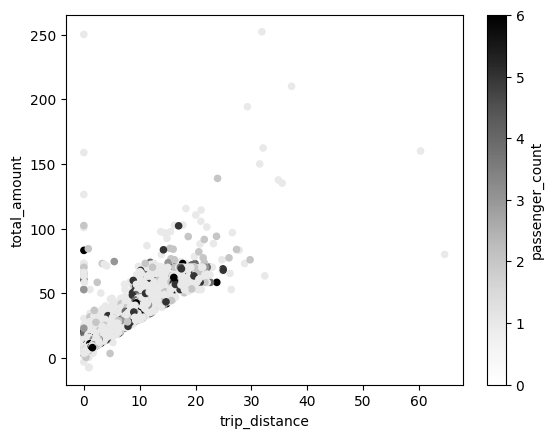

In [150]:
df.plot.scatter(x='trip_distance', y='total_amount', c='passenger_count')

ValueError: 'asdfasf' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Grays_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'berlin', 'berlin_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_grey_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gist_yerg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'grey_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'managua', 'managua_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'vanimo', 'vanimo_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

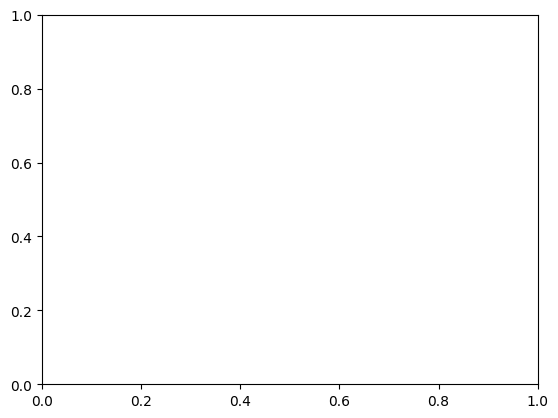

In [151]:
df.plot.scatter(x='trip_distance', y='total_amount', c='passenger_count', colormap='asdfasf')

ValueError: s must be a scalar, or float array-like with the same size as x and y

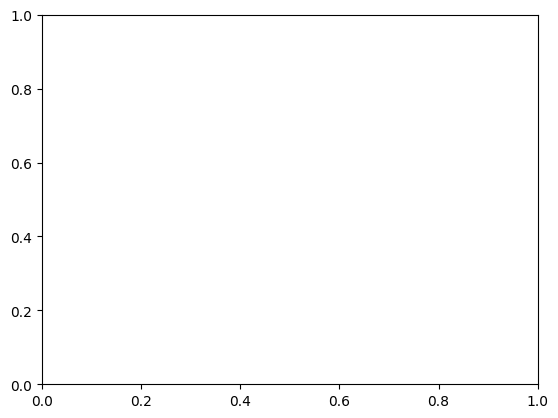

In [154]:
df.plot.scatter(x='trip_distance', y='total_amount', c='passenger_count', colormap='managua',
               s='passenger_count'*10)